In [19]:
import h5py

# Specify the full path to the HDF5 file including the folder
hdf5_filename = '/mnt/e/PdM/DataX/NASA/Temp_Data/processed_data.h5'

# Open the HDF5 file for reading
hdf5_file = h5py.File(hdf5_filename, 'r')

# Load the datasets into variables
X = hdf5_file['X_train'][:]
X_test = hdf5_file['X_test'][:]
y = hdf5_file['y'][:]
y_test = hdf5_file['y_test'][:]

# Close the HDF5 file
hdf5_file.close()


In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal

# Example: Preprocessing function to reshape data into sequences
def create_sequences(X, y, time_steps=18):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Assuming X_train, y_train are already defined
time_steps = 18  # Number of timesteps per sequence
X_train_seq, y_train_seq = create_sequences(X, y, time_steps)


# Xavier (Glorot) initializer
initializer = GlorotNormal()

# Build the LSTM model
n_features = 18  # Number of features
model = Sequential([
    LSTM(40, input_shape=(time_steps, n_features), activation='relu',  kernel_initializer=initializer, 
         return_sequences=True),
    # Dropout(0.01),
    LSTM(20, activation='relu',  kernel_initializer=initializer),
    # Dropout(0.1),
    Dense(5, activation='relu',  kernel_initializer=initializer),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# Summary of the model
model.summary()




Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 18, 40)            9440      
                                                                 
 lstm_19 (LSTM)              (None, 20)                4880      
                                                                 
 dense_23 (Dense)            (None, 5)                 105       
                                                                 
 dense_24 (Dense)            (None, 1)                 6         
                                                                 
Total params: 14,431
Trainable params: 14,431
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_train_seq, y_train_seq,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.1)

Epoch 1/10
2251/2251 [==============================] - 571s 250ms/step - loss: 175.7287 - mean_squared_error: 175.7287 - val_loss: 7.5959 - val_mean_squared_error: 7.5959
Epoch 2/10
2251/2251 [==============================] - 504s 224ms/step - loss: 43.0822 - mean_squared_error: 43.0822 - val_loss: 19.8065 - val_mean_squared_error: 19.8065
Epoch 3/10
2251/2251 [==============================] - 471s 209ms/step - loss: 36.2983 - mean_squared_error: 36.2983 - val_loss: 8.5518 - val_mean_squared_error: 8.5518
Epoch 4/10
2251/2251 [==============================] - 470s 209ms/step - loss: 32.2259 - mean_squared_error: 32.2259 - val_loss: 9.2388 - val_mean_squared_error: 9.2388
Epoch 5/10
2251/2251 [==============================] - 470s 209ms/step - loss: 29.3512 - mean_squared_error: 29.3512 - val_loss: 8.3557 - val_mean_squared_error: 8.3557
Epoch 6/10
2251/2251 [==============================] - 542s 241ms/step - loss: 27.3836 - mean_squared_error: 27.3836 - val_loss: 14.0729 - val_me

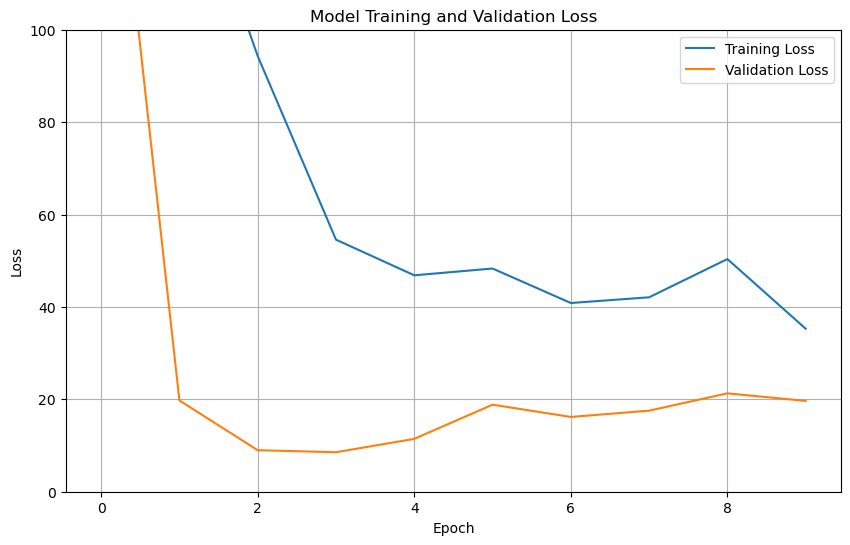

In [27]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 100)
plt.legend()
plt.grid(True)
plt.show()


In [29]:
X_train_seq, y_train_seq = create_sequences(X_test, y_test, time_steps)
y_test_hat = model.predict(X_train_seq)

25009/25009 [==============================] - 462s 18ms/step


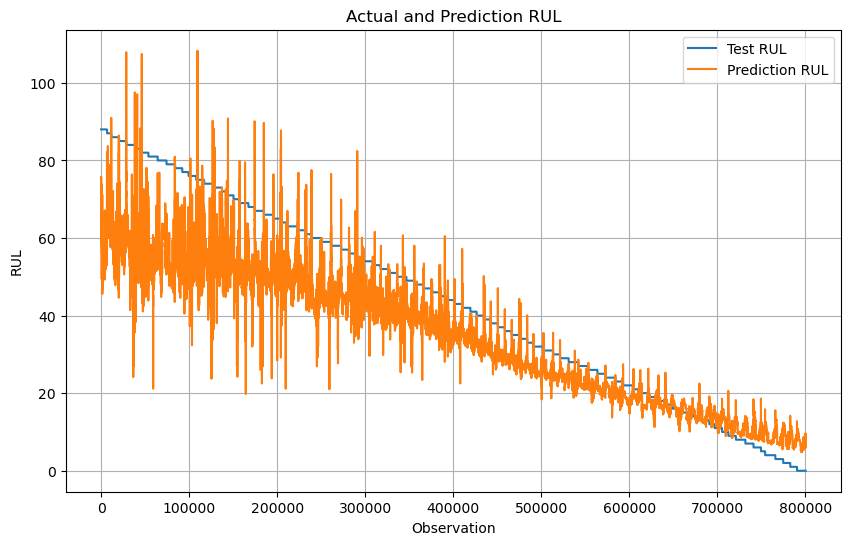

In [30]:

# Plotting the test and prediction
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Test RUL')
plt.plot(y_test_hat, label='Prediction RUL')
plt.title('Actual and Prediction RUL')
plt.xlabel('Observation')
plt.ylabel('RUL')
plt.legend()
plt.grid(True)
plt.show()